# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading Dataset

In [2]:
traffic_data = pd.read_csv('../../data/US_Accidents_March23_sampled_500k.csv')

In [3]:
print(traffic_data)

               ID   Source  Severity                     Start_Time  \
0       A-2047758  Source2         2            2019-06-12 10:10:56   
1       A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2       A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3       A-4237356  Source1         2            2022-02-21 17:43:04   
4       A-6690583  Source1         2            2020-12-04 01:46:00   
...           ...      ...       ...                            ...   
499995  A-6077227  Source1         2            2021-12-15 07:30:00   
499996  A-6323243  Source1         2            2021-12-19 16:25:00   
499997  A-3789256  Source1         2            2022-04-13 19:28:29   
499998  A-7030381  Source1         3            2020-05-15 17:20:56   
499999  A-5438901  Source1         2            2022-04-02 23:23:13   

                             End_Time  Start_Lat   Start_Lng    End_Lat  \
0                 2019-06-12 10:55:58  30.641211  -91.153481        NaN 

# Data Cleaning

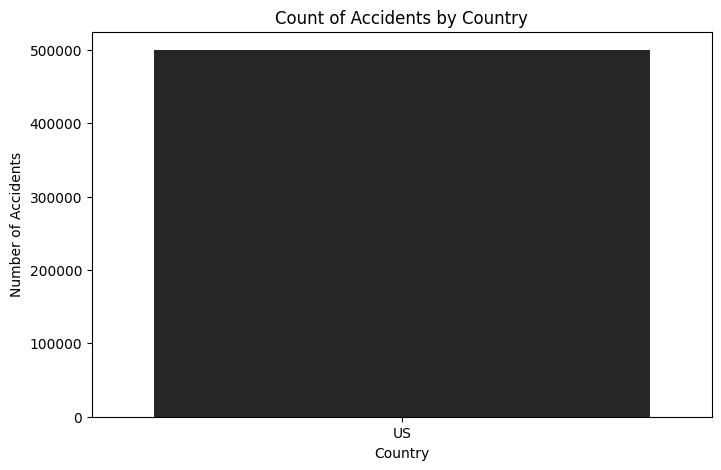

In [4]:
# Bar chart of country
country_counts = traffic_data['Country'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='dark:skyblue')

plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Country")
plt.show()

## Drop useless columns

In [5]:
traffic_data = traffic_data.drop(['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Street', 'County', 'Country', 'Timezone', 'Airport_Code', 'Wind_Chill(F)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'ID','Description'], axis=1)
print(traffic_data.shape)

(500000, 29)


## Removing Missing Values

In [6]:
print(traffic_data.columns)

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [7]:
missing_values = traffic_data.isnull().sum()
print(missing_values[missing_values > 0], '\n')

missing_percentage = (traffic_data.isna().sum() / len(traffic_data)) * 100
print(missing_percentage.sort_values(ascending=False))

City                     19
Zipcode                 116
Weather_Timestamp      7674
Temperature(F)        10466
Humidity(%)           11130
Pressure(in)           8928
Visibility(mi)        11291
Wind_Direction        11197
Wind_Speed(mph)       36987
Precipitation(in)    142616
Weather_Condition     11101
dtype: int64 

Precipitation(in)    28.5232
Wind_Speed(mph)       7.3974
Visibility(mi)        2.2582
Wind_Direction        2.2394
Humidity(%)           2.2260
Weather_Condition     2.2202
Temperature(F)        2.0932
Pressure(in)          1.7856
Weather_Timestamp     1.5348
Zipcode               0.0232
City                  0.0038
Stop                  0.0000
Junction              0.0000
Traffic_Calming       0.0000
Traffic_Signal        0.0000
Station               0.0000
Roundabout            0.0000
Railway               0.0000
No_Exit               0.0000
Severity              0.0000
Give_Way              0.0000
Crossing              0.0000
Bump                  0.0000
Amenity   

In [8]:
traffic_data_cleaned = traffic_data.dropna()
print(traffic_data_cleaned.shape)

(348687, 29)


## Data Sampling

In [9]:
sampled_data = traffic_data_cleaned

# Data Preparation

In [10]:
# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

#Convert Start_Time to datetime
sampled_data['Start_Time'] = sampled_data['Start_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['Start_Time'] = pd.to_datetime(sampled_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

object


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/1894891182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Start_Time'] = sampled_data['Start_Time'].str.split('.').str[0]  # Remove nanoseconds


datetime64[ns]


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/1894891182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Start_Time'] = pd.to_datetime(sampled_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')


In [11]:
# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

#Convert End_Time to datetime
sampled_data['End_Time'] = sampled_data['End_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['End_Time'] = pd.to_datetime(sampled_data['End_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

object
datetime64[ns]


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/2358720783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['End_Time'] = sampled_data['End_Time'].str.split('.').str[0]  # Remove nanoseconds
/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/2358720783.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['End_Time'] = pd.to_datetime(sampled_data['End_Time'], format='%Y-%m-%d %H:%M:%S')


In [12]:
sampled_data["Start_Time"]

0        2019-06-12 10:10:56
1        2022-12-03 23:37:14
2        2022-08-20 13:13:00
3        2022-02-21 17:43:04
4        2020-12-04 01:46:00
                 ...        
499995   2021-12-15 07:30:00
499996   2021-12-19 16:25:00
499997   2022-04-13 19:28:29
499998   2020-05-15 17:20:56
499999   2022-04-02 23:23:13
Name: Start_Time, Length: 348687, dtype: datetime64[ns]

In [13]:
sampled_data["End_Time"]

0        2019-06-12 10:55:58
1        2022-12-04 01:56:53
2        2022-08-20 15:22:45
3        2022-02-21 19:43:23
4        2020-12-04 04:13:09
                 ...        
499995   2021-12-15 07:50:30
499996   2021-12-19 17:40:37
499997   2022-04-13 21:33:44
499998   2020-05-15 17:50:56
499999   2022-04-03 00:49:48
Name: End_Time, Length: 348687, dtype: datetime64[ns]

## Compute Duration Column using Start_Time and End_Time

In [14]:
sampled_data['Duration'] = sampled_data['End_Time'] - sampled_data['Start_Time']

print(sampled_data['Duration'])

0        0 days 00:45:02
1        0 days 02:19:39
2        0 days 02:09:45
3        0 days 02:00:19
4        0 days 02:27:09
               ...      
499995   0 days 00:20:30
499996   0 days 01:15:37
499997   0 days 02:05:15
499998   0 days 00:30:00
499999   0 days 01:26:35
Name: Duration, Length: 348687, dtype: timedelta64[ns]


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/3757903477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Duration'] = sampled_data['End_Time'] - sampled_data['Start_Time']


In [15]:
# duration in minutes
sampled_data['Duration'] = sampled_data['Duration'].dt.total_seconds() / 60

print(sampled_data['Duration'])

0          45.033333
1         139.650000
2         129.750000
3         120.316667
4         147.150000
             ...    
499995     20.500000
499996     75.616667
499997    125.250000
499998     30.000000
499999     86.583333
Name: Duration, Length: 348687, dtype: float64


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/1217961150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Duration'] = sampled_data['Duration'].dt.total_seconds() / 60


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/4071210525.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Severity', y='Duration', palette='dark:skyblue')


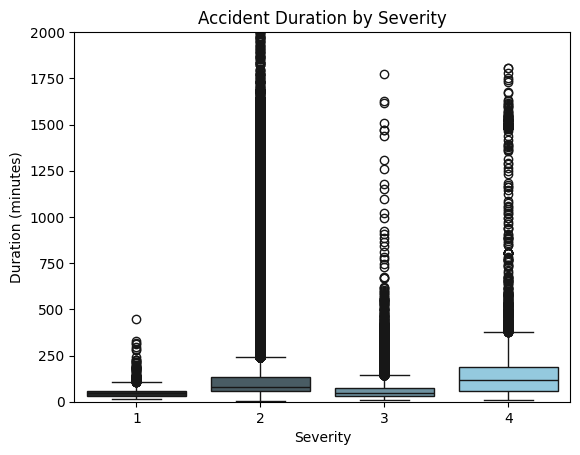

In [16]:
sns.boxplot(data=sampled_data, x='Severity', y='Duration', palette='dark:skyblue')
plt.ylim(0, 2000)  # Limit extreme values for readability
plt.title("Accident Duration by Severity")
plt.xlabel("Severity")
plt.ylabel("Duration (minutes)")  # if you converted it
plt.show()


## Data Encoding for Start_Time Column (convert to minutes after midnight)

In [17]:
#Convert to Minutes After Midnight
sampled_data['Start_Time'] = (
    sampled_data['Start_Time'].dt.hour * 60 + sampled_data['Start_Time'].dt.minute
)

print(sampled_data['Start_Time'])

0          610
1         1417
2          793
3         1063
4          106
          ... 
499995     450
499996     985
499997    1168
499998    1040
499999    1403
Name: Start_Time, Length: 348687, dtype: int32


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/3956765554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Start_Time'] = (


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/596301918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Severity', y='Start_Time', palette='dark:skyblue')


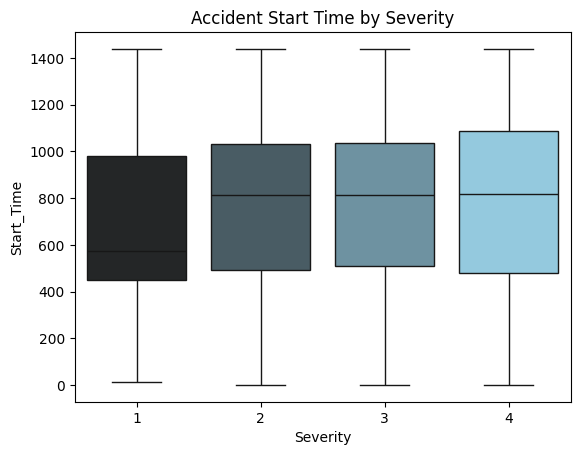

In [18]:
sns.boxplot(data=sampled_data, x='Severity', y='Start_Time', palette='dark:skyblue')
plt.title("Accident Start Time by Severity")
plt.show()


## Data Encoding for End_Time Column (convert to minutes after midnight)

In [19]:
#Convert to Minutes After Midnight
sampled_data['End_Time'] = (
    sampled_data['End_Time'].dt.hour * 60 + sampled_data['End_Time'].dt.minute
)

print(sampled_data['End_Time'])

0          655
1          116
2          922
3         1183
4          253
          ... 
499995     470
499996    1060
499997    1293
499998    1070
499999      49
Name: End_Time, Length: 348687, dtype: int32


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/34239385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['End_Time'] = (


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/1886448690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Severity', y='End_Time', palette='dark:skyblue')


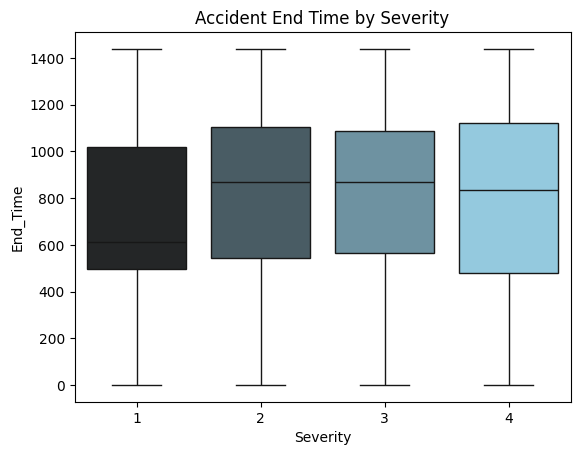

In [20]:
sns.boxplot(data=sampled_data, x='Severity', y='End_Time', palette='dark:skyblue')
plt.title("Accident End Time by Severity")
plt.show()


## Encode Zipcode into Region using First Digit

In [21]:
sampled_data['Zipcode']

0         70791-4610
1         20164-2813
2              93436
3              55912
4         93305-2649
             ...    
499995    97116-2174
499996    33409-4712
499997         86327
499998         22827
499999    37406-2132
Name: Zipcode, Length: 348687, dtype: object

/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/141599592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Region'] = sampled_data['Zipcode'].str[0]


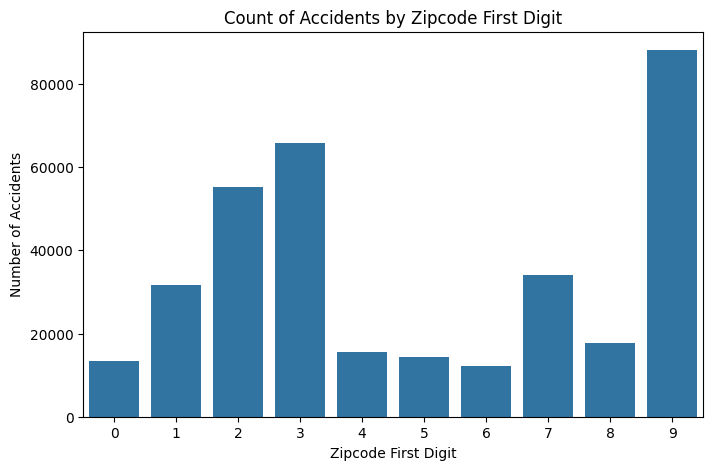

In [22]:
# Bar chart of zipcode
# Extract the first digit of the zip code (assuming the zip code is a string or integer)
sampled_data['Region'] = sampled_data['Zipcode'].str[0]

zipcode_counts = sampled_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

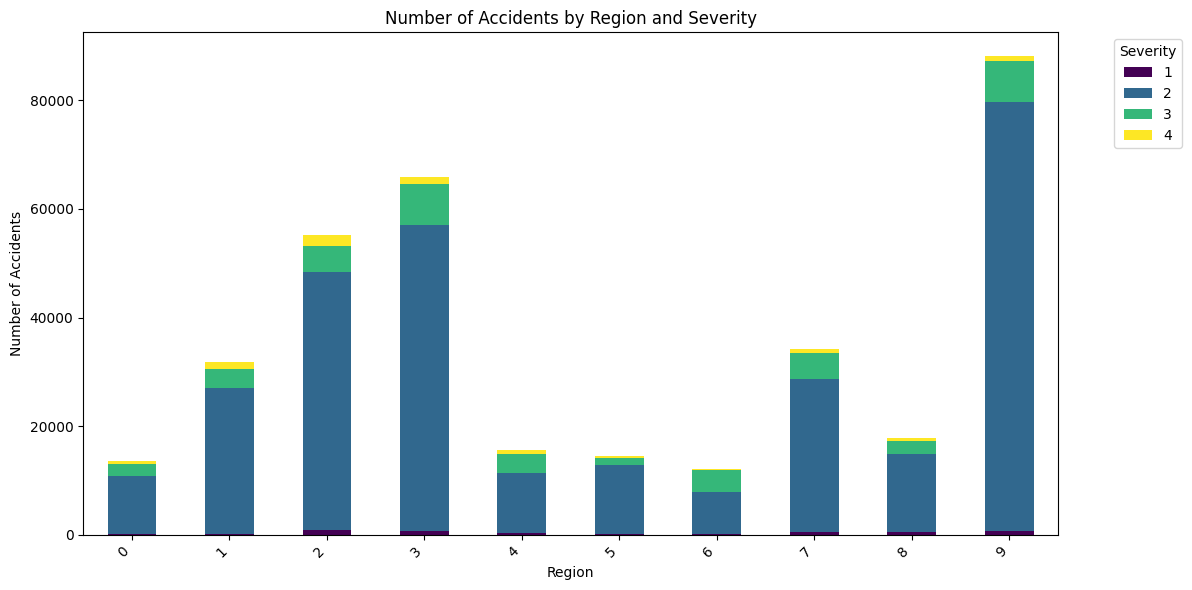

In [23]:
severity_region_counts = pd.crosstab(sampled_data['Region'], sampled_data['Severity'])

severity_region_counts.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(12, 6)
)
plt.title('Number of Accidents by Region and Severity')
plt.xlabel('Region')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


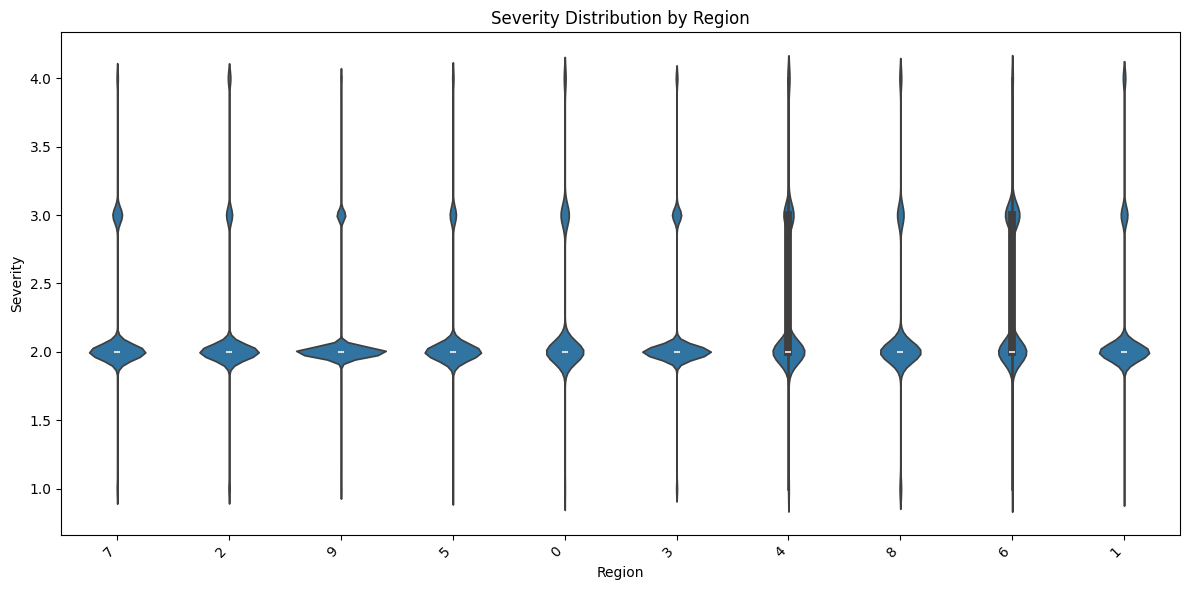

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='Region', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by Region')
plt.tight_layout()
plt.show()

In [25]:
sampled_data['Region'] = sampled_data['Region'].astype(int)

/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/3813289114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Region'] = sampled_data['Region'].astype(int)


In [26]:
print(sampled_data.shape)
sampled_data.drop(columns=['Zipcode'], inplace=True)
print(sampled_data.shape)


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/2473347318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data.drop(columns=['Zipcode'], inplace=True)


(348687, 31)
(348687, 30)


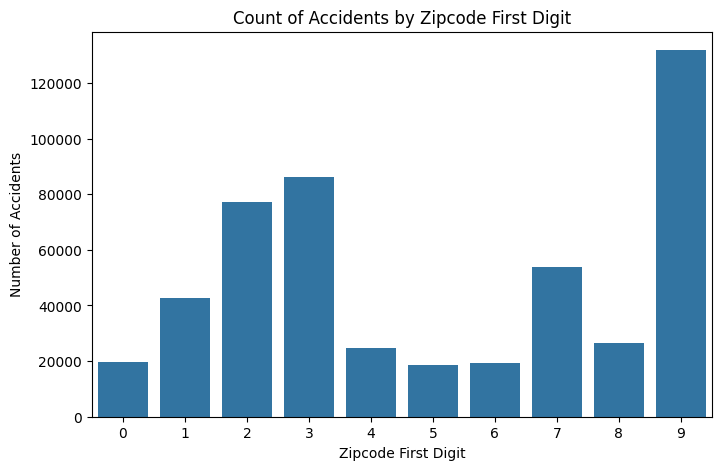

In [27]:
## Compare the distribution with original dataset
traffic_data['Region'] = traffic_data['Zipcode'].str[0]

zipcode_counts = traffic_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

## Encode 'State' into Top 3 States and None of the Above

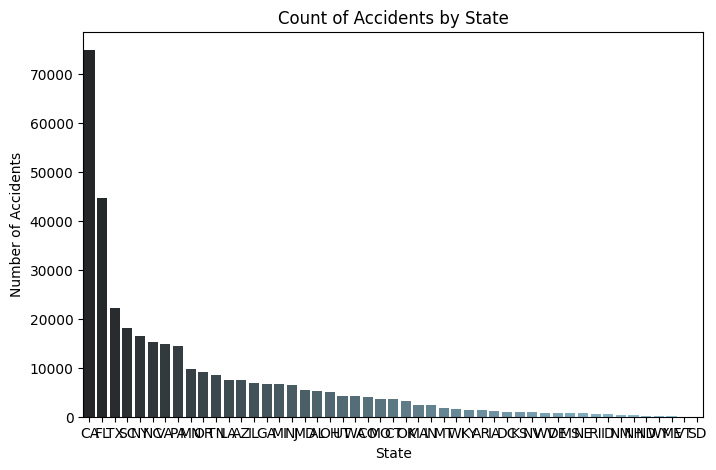

In [28]:
# Bar chart of state
## Use the original traffic data since the sampled data distribution might be distorted due to stratefied sampling
state_counts = sampled_data['State'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State")
plt.show()

/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/939267745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['State'] = sampled_data['State'].map(state_mapping)


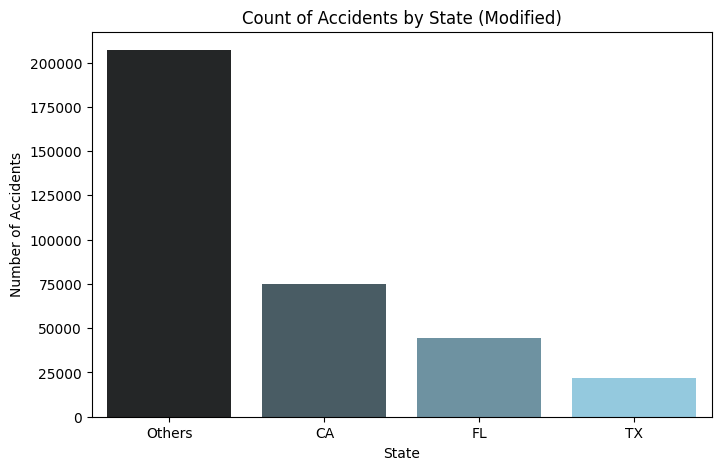

In [29]:
# Get the top 3 states
top_3 = state_counts.nlargest(3)

# Create a mapping where top 3 states are kept, and others are labeled as 'Others'
state_mapping = state_counts.index.to_series().apply(lambda x: x if x in top_3.index else 'Others')

# Apply the mapping to the 'State' column
sampled_data['State'] = sampled_data['State'].map(state_mapping)

# new Bar Chart for State
state_counts = sampled_data['State'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State (Modified)")
plt.show()

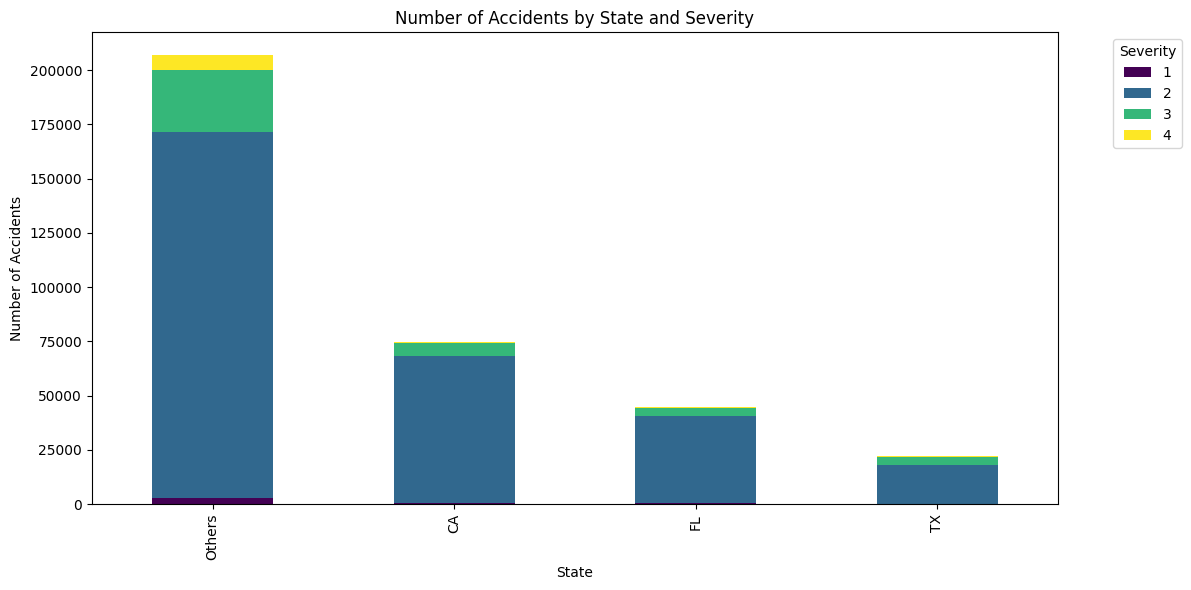

In [30]:
state_severity_counts = pd.crosstab(sampled_data['State'], sampled_data['Severity']).sort_index()

# Sort by total count in descending order
state_severity_counts['Total'] = state_severity_counts.sum(axis=1)
state_severity_counts = state_severity_counts.sort_values('Total', ascending=False)
state_severity_counts.drop(columns='Total', inplace=True)

state_severity_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by State and Severity")
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


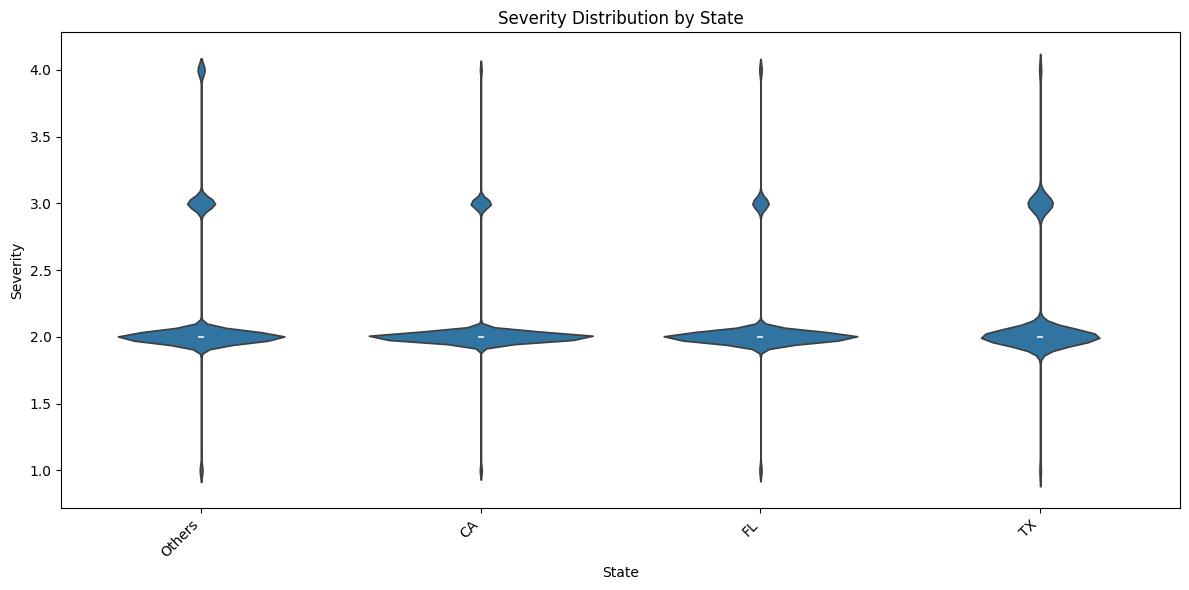

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='State', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by State')
plt.tight_layout()
plt.show()

In [32]:
# Perform One-Hot Encoding on the 'State' column
state_dummies = pd.get_dummies(sampled_data['State'], prefix='State')

# Convert True/False to 1/0 explicitly
state_dummies = state_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, state_dummies], axis=1)

# Drop the original 'State' column
sampled_data.drop(columns=['State'], inplace=True)

print(sampled_data.head())

   Severity  Start_Time  End_Time  Distance(mi)         City  \
0         2         610       655         0.000      Zachary   
1         2        1417       116         0.056     Sterling   
2         2         793       922         0.022       Lompoc   
3         2        1063      1183         1.054       Austin   
4         2         106       253         0.046  Bakersfield   

     Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  \
0  2019-06-12 09:53:00            77.0         62.0         29.92   
1  2022-12-03 23:52:00            45.0         48.0         29.91   
2  2022-08-20 12:56:00            68.0         73.0         29.79   
3  2022-02-21 17:35:00            27.0         86.0         28.49   
4  2020-12-04 01:54:00            42.0         34.0         29.77   

   Visibility(mi)  ...   Stop  Traffic_Calming  Traffic_Signal Turning_Loop  \
0            10.0  ...  False            False            True        False   
1            10.0  ...  False            F

## Encode 'City' into Top 5 Cities and None of the above

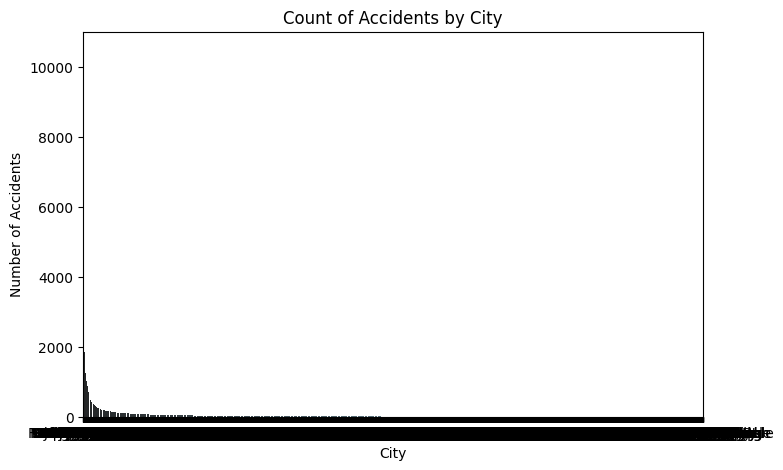

In [33]:
# Bar chart of city
## Use remaining_df (original dataset without valid-test set, to prevent data leakage and maintaining original data distribution)
city_counts = sampled_data['City'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City")
plt.show()

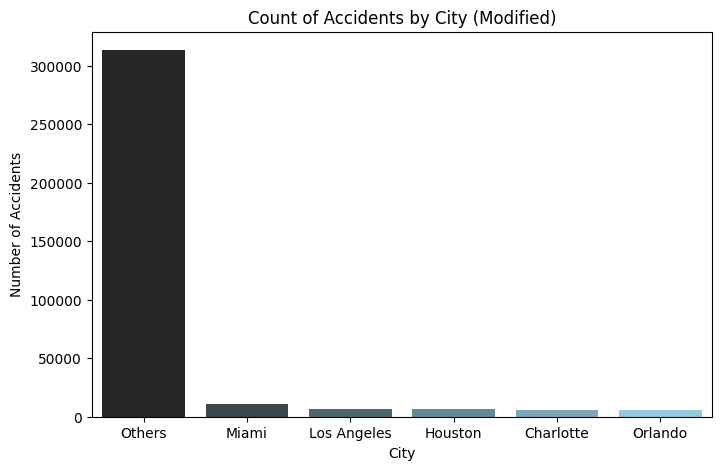

In [34]:
# Get the top 5 cities
top_5 = city_counts.nlargest(5)

# Create a mapping where top 5 cities are kept, and others are labeled as 'Others'
city_mapping = city_counts.index.to_series().apply(lambda x: x if x in top_5.index else 'Others')

# Apply the mapping to the 'City' column
sampled_data['City'] = sampled_data['City'].map(city_mapping)

# new Bar Chart for City
city_counts = sampled_data['City'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City (Modified)")
plt.show()

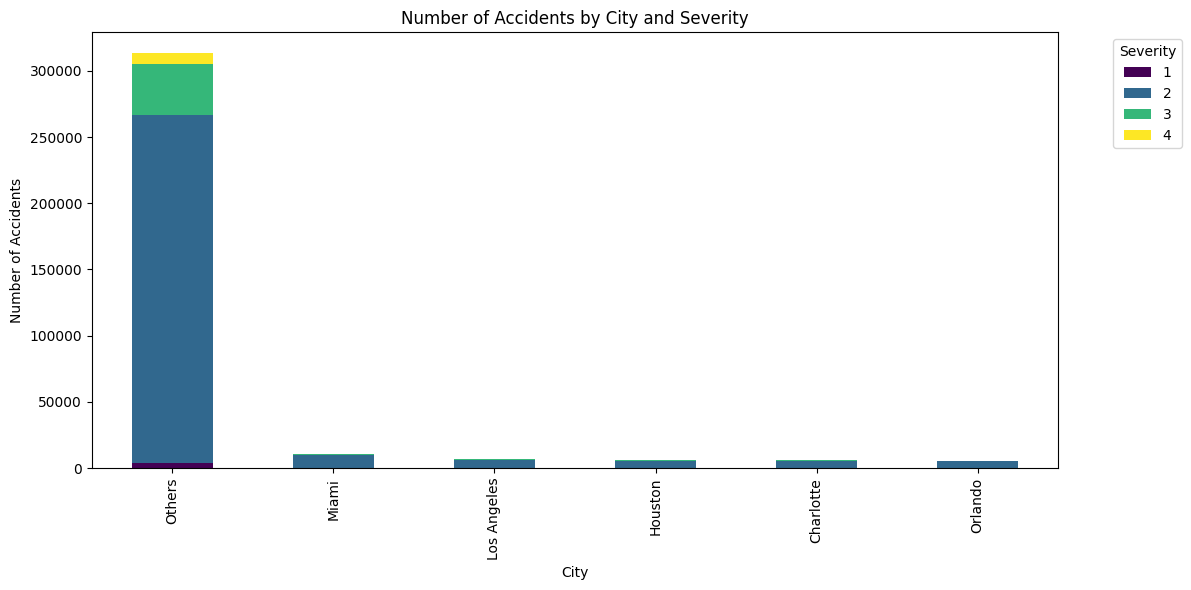

In [35]:
city_severity_counts = pd.crosstab(sampled_data['City'], sampled_data['Severity']).sort_index()

# Sort by total count in descending order
city_severity_counts['Total'] = city_severity_counts.sum(axis=1)
city_severity_counts = city_severity_counts.sort_values('Total', ascending=False)
city_severity_counts.drop(columns='Total', inplace=True)

city_severity_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by City and Severity")
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


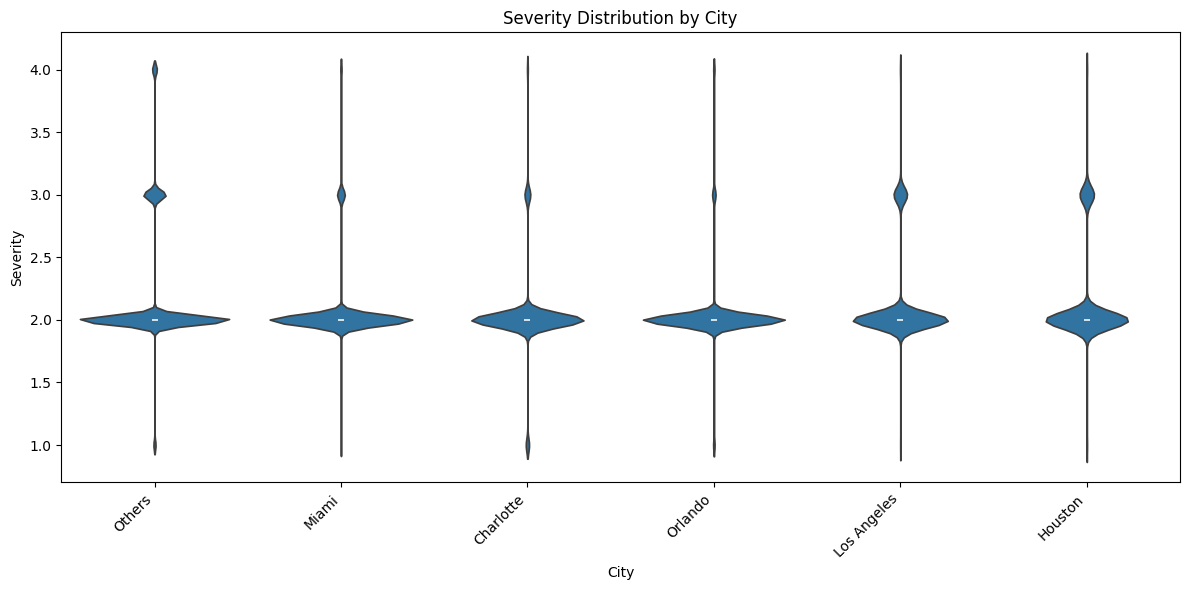

In [36]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='City', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by City')
plt.tight_layout()
plt.show()

In [37]:
# Perform One-Hot Encoding on the 'City' column
city_dummies = pd.get_dummies(sampled_data['City'], prefix='City')

# Convert True/False to 1/0 explicitly
city_dummies = city_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, city_dummies], axis=1)

# Drop the original 'City' column
sampled_data.drop(columns=['City'], inplace=True)

#print(sampled_data.head())

## Cluster 'Weather_Condition' into 6 Broad Categories then One-Hot Encoding


In [38]:
## Using remaining_df to get more weather_condition categories but still excluding valid and test data
print(sampled_data['Weather_Condition'].unique())

['Fair' 'Wintry Mix' 'Light Rain' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Fog' 'T-Storm' 'Light Snow' 'Overcast' 'Thunder'
 'Light Rain with Thunder' 'Rain' 'Showers in the Vicinity'
 'Mostly Cloudy / Windy' 'Heavy Rain' 'Cloudy / Windy' 'Light Drizzle'
 'Heavy T-Storm' 'Light Rain / Windy' 'Smoke' 'Blowing Dust / Windy'
 'Haze' 'N/A Precipitation' 'Thunder in the Vicinity' 'Snow'
 'Scattered Clouds' 'Heavy Thunderstorms and Rain' 'Fair / Windy'
 'Patches of Fog' 'Light Snow / Windy' 'Blowing Snow / Windy' 'Drizzle'
 'T-Storm / Windy' 'Partly Cloudy / Windy' 'Shallow Fog' 'Clear'
 'Thunderstorms and Rain' 'Heavy Rain / Windy' 'Heavy Snow / Windy'
 'Light Thunderstorms and Rain' 'Rain / Windy' 'Light Freezing Rain'
 'Heavy Snow' 'Light Ice Pellets' 'Light Freezing Drizzle'
 'Heavy T-Storm / Windy' 'Heavy Drizzle' 'Sleet' 'Mist'
 'Light Rain Shower' 'Haze / Windy' 'Snow and Sleet' 'Snow / Windy'
 'Thunderstorm' 'Fog / Windy' 'Sleet / Windy' 'Light Sleet'
 'Sand / Dust Whirlwinds' 'Squ

In [39]:
# Mapping for standardizing weather conditions to 5 categories and "Others"
weather_mapping = {
    # Cloud is grouped in the same category as Clear as cloudy doesnt really affect traffic conditions that much
    'Clear': 'Clear / Cloudy', 'Cloudy': 'Clear / Cloudy', 'Partly Cloudy': 'Clear / Cloudy',
    'Mostly Cloudy': 'Clear / Cloudy', 'Overcast': 'Clear / Cloudy', 'Fair': 'Clear / Cloudy',
    'Fair / Windy': 'Clear / Cloudy', 'Mostly Cloudy / Windy': 'Clear / Cloudy', 'Partly Cloudy / Windy': 'Clear / Cloudy',
    'Cloudy / Windy': 'Clear / Cloudy', 'Scattered Clouds': 'Clear / Cloudy',

    'Light Rain': 'Rain', 'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain Shower': 'Rain',
    'Rain / Windy': 'Rain', 'Heavy Rain / Windy': 'Rain', 'Drizzle': 'Rain',
    'Light Freezing Drizzle': 'Rain', 'Light Rain with Thunder': 'Rain', 'Light Drizzle': 'Rain',
    'Light Freezing Rain': 'Rain', 'Freezing Drizzle': 'Rain', 'Showers in the Vicinity': 'Rain',
    'Light Rain / Windy': 'Rain', 'Heavy Drizzle': 'Rain', 'Light Freezing Rain / Windy': 'Rain',
    'Light Drizzle / Windy': 'Rain', 'Freezing Rain': 'Rain', 'Light Rain Showers': 'Rain',
    'Light Rain Shower / Windy': 'Rain', 'Rain Showers': 'Rain', 'Drizzle / Windy': 'Rain',

    'Light Snow': 'Snow', 'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Snow / Windy': 'Snow',
    'Light Snow Shower': 'Snow', 'Snow Grains': 'Snow', 'Blowing Snow': 'Snow',
    'Light Snow / Windy': 'Snow', 'Heavy Snow / Windy': 'Snow', 'Light Snow with Thunder': 'Snow',
    'Light Snow and Sleet': 'Snow', 'Snow and Sleet': 'Snow', 'Sleet / Windy': 'Snow',
    'Light Snow Showers': 'Snow', 'Light Snow and Sleet / Windy': 'Snow', 'Snow and Sleet / Windy': 'Snow',
    'Sleet': 'Snow', 'Light Sleet': 'Snow', 'Light Snow Showers': 'Snow', 'Ice Pellets': 'Snow',
    'Blowing Snow': 'Snow', 'Drifting Snow / Windy': 'Snow', 'Blowing Snow / Windy': 'Snow',
    'Snow and Thunder': 'Snow', 'Wintry Mix / Windy': 'Snow', 'Heavy Sleet': 'Snow',
    'Light Snow Grains': 'Snow', 'Light Blowing Snow': 'Snow', 'Light Ice Pellets': 'Snow',

    'Fog': 'Fog / Low Visibility', 'Shallow Fog': 'Fog / Low Visibility', 'Mist': 'Fog / Low Visibility',
    'Light Freezing Fog': 'Fog / Low Visibility', 'Fog / Windy': 'Fog / Low Visibility',
    'Partial Fog / Windy': 'Fog / Low Visibility', 'Drizzle and Fog': 'Fog / Low Visibility',
    'Patches of Fog': 'Fog / Low Visibility', 'Haze / Windy': 'Fog / Low Visibility',
    'Partial Fog': 'Fog / Low Visibility', 'Smoke': 'Fog / Low Visibility', 'Haze': 'Fog / Low Visibility',
    'Blowing Dust': 'Fog / Low Visibility', 'Blowing Dust / Windy': 'Fog / Low Visibility',
    'Sand / Dust Whirlwinds': 'Fog / Low Visibility', 'Widespread Dust': 'Fog / Low Visibility',
    'Smoke / Windy': 'Fog / Low Visibility', 'Widespread Dust / Windy': 'Fog / Low Visibility',

    'Thunderstorm': 'Thunderstorms / Severe Weather', 'T-Storm': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm': 'Thunderstorms / Severe Weather', 'Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Light Thunderstorms and Rain': 'Thunderstorms / Severe Weather', 'Thunder / Windy': 'Thunderstorms / Severe Weather',
    'Thunder in the Vicinity': 'Thunderstorms / Severe Weather', 'Heavy Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Tornado': 'Thunderstorms / Severe Weather', 'Thunder / Wintry Mix': 'Thunderstorms / Severe Weather', 'Light Thunderstorms and Snow': 'Thunderstorms / Severe Weather',
    'Wintry Mix': 'Thunderstorms / Severe Weather', 'Thunder': 'Thunderstorms / Severe Weather', 'T-Storm / Windy': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm / Windy': 'Thunderstorms / Severe Weather', 'Funnel Cloud': 'Thunderstorms / Severe Weather', 'Thunder and Hail': 'Thunderstorms / Severe Weather',
    'Hail': 'Thunderstorms / Severe Weather', 'Squalls': 'Thunderstorms / Severe Weather', 'Volcanic Ash': 'Thunderstorms / Severe Weather',
    'Squalls / Windy': 'Thunderstorms / Severe Weather', 'Small Hail': 'Thunderstorms / Severe Weather', 'Light Hail': 'Thunderstorms / Severe Weather',

    # Grouping other categories as "Others"
    'N/A Precipitation': 'Others'
}

sampled_data['Weather_Condition'] = sampled_data['Weather_Condition'].map(weather_mapping).fillna('Others')


In [40]:
print(sampled_data['Weather_Condition'])

0                         Clear / Cloudy
1                         Clear / Cloudy
2                         Clear / Cloudy
3         Thunderstorms / Severe Weather
4                         Clear / Cloudy
                       ...              
499995                              Rain
499996                    Clear / Cloudy
499997                    Clear / Cloudy
499998                    Clear / Cloudy
499999                    Clear / Cloudy
Name: Weather_Condition, Length: 348687, dtype: object


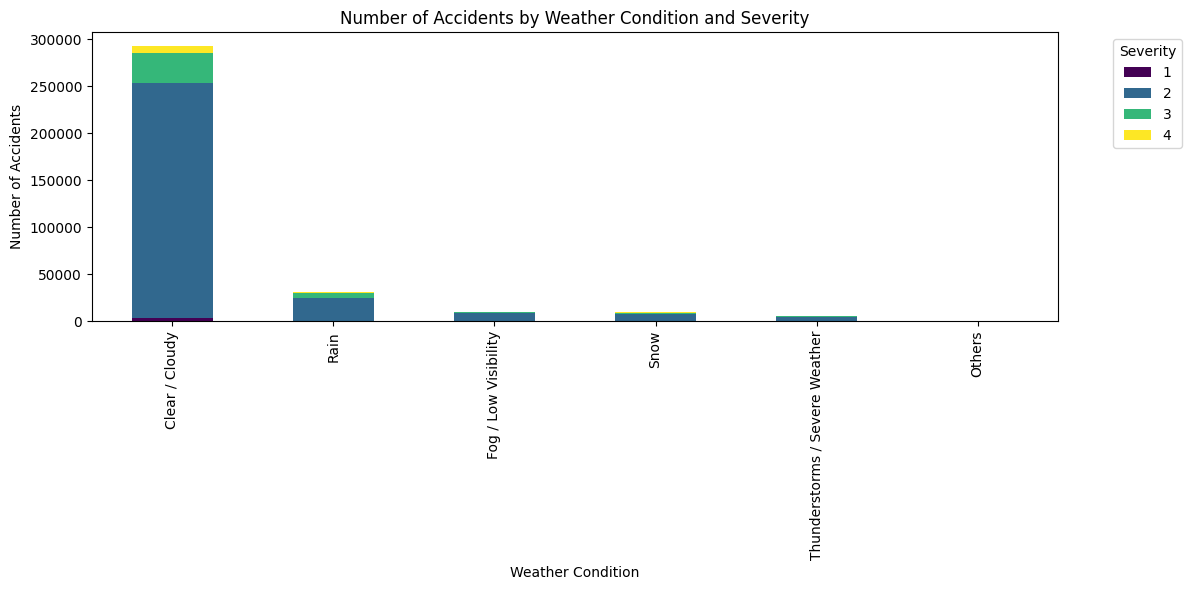

In [41]:
weather_severity_counts = pd.crosstab(sampled_data['Weather_Condition'], sampled_data['Severity']).sort_index()

# Sort by total count in descending order
weather_severity_counts['Total'] = weather_severity_counts.sum(axis=1)
weather_severity_counts = weather_severity_counts.sort_values('Total', ascending=False)
weather_severity_counts.drop(columns='Total', inplace=True)

weather_severity_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Weather Condition and Severity")
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


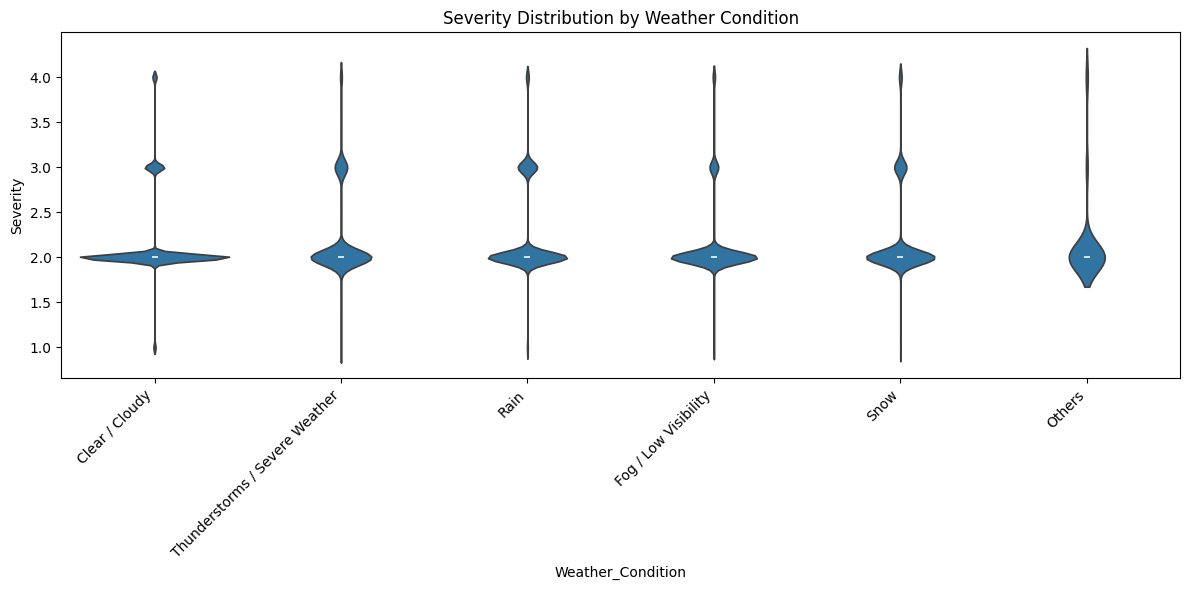

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='Weather_Condition', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by Weather Condition')
plt.tight_layout()
plt.show()


In [43]:
# Perform One-Hot Encoding on the 'Weather_Condition' column
weather_condition_dummies = pd.get_dummies(sampled_data['Weather_Condition'], prefix='Weather_Condition')

# Convert True/False to 1/0 explicitly
weather_condition_dummies = weather_condition_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_condition_dummies], axis=1)

# Drop the original 'Weather_Condition' column
sampled_data.drop(columns=['Weather_Condition'], inplace=True)

print(sampled_data.head())

   Severity  Start_Time  End_Time  Distance(mi)    Weather_Timestamp  \
0         2         610       655         0.000  2019-06-12 09:53:00   
1         2        1417       116         0.056  2022-12-03 23:52:00   
2         2         793       922         0.022  2022-08-20 12:56:00   
3         2        1063      1183         1.054  2022-02-21 17:35:00   
4         2         106       253         0.046  2020-12-04 01:54:00   

   Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0            77.0         62.0         29.92            10.0             NW   
1            45.0         48.0         29.91            10.0              W   
2            68.0         73.0         29.79            10.0              W   
3            27.0         86.0         28.49            10.0            ENE   
4            42.0         34.0         29.77            10.0           CALM   

   ...  City_Los Angeles  City_Miami  City_Orlando  City_Others  \
0  ...                 0 

## Encode Weather Timestamp

/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/1795776564.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(severity_levels))


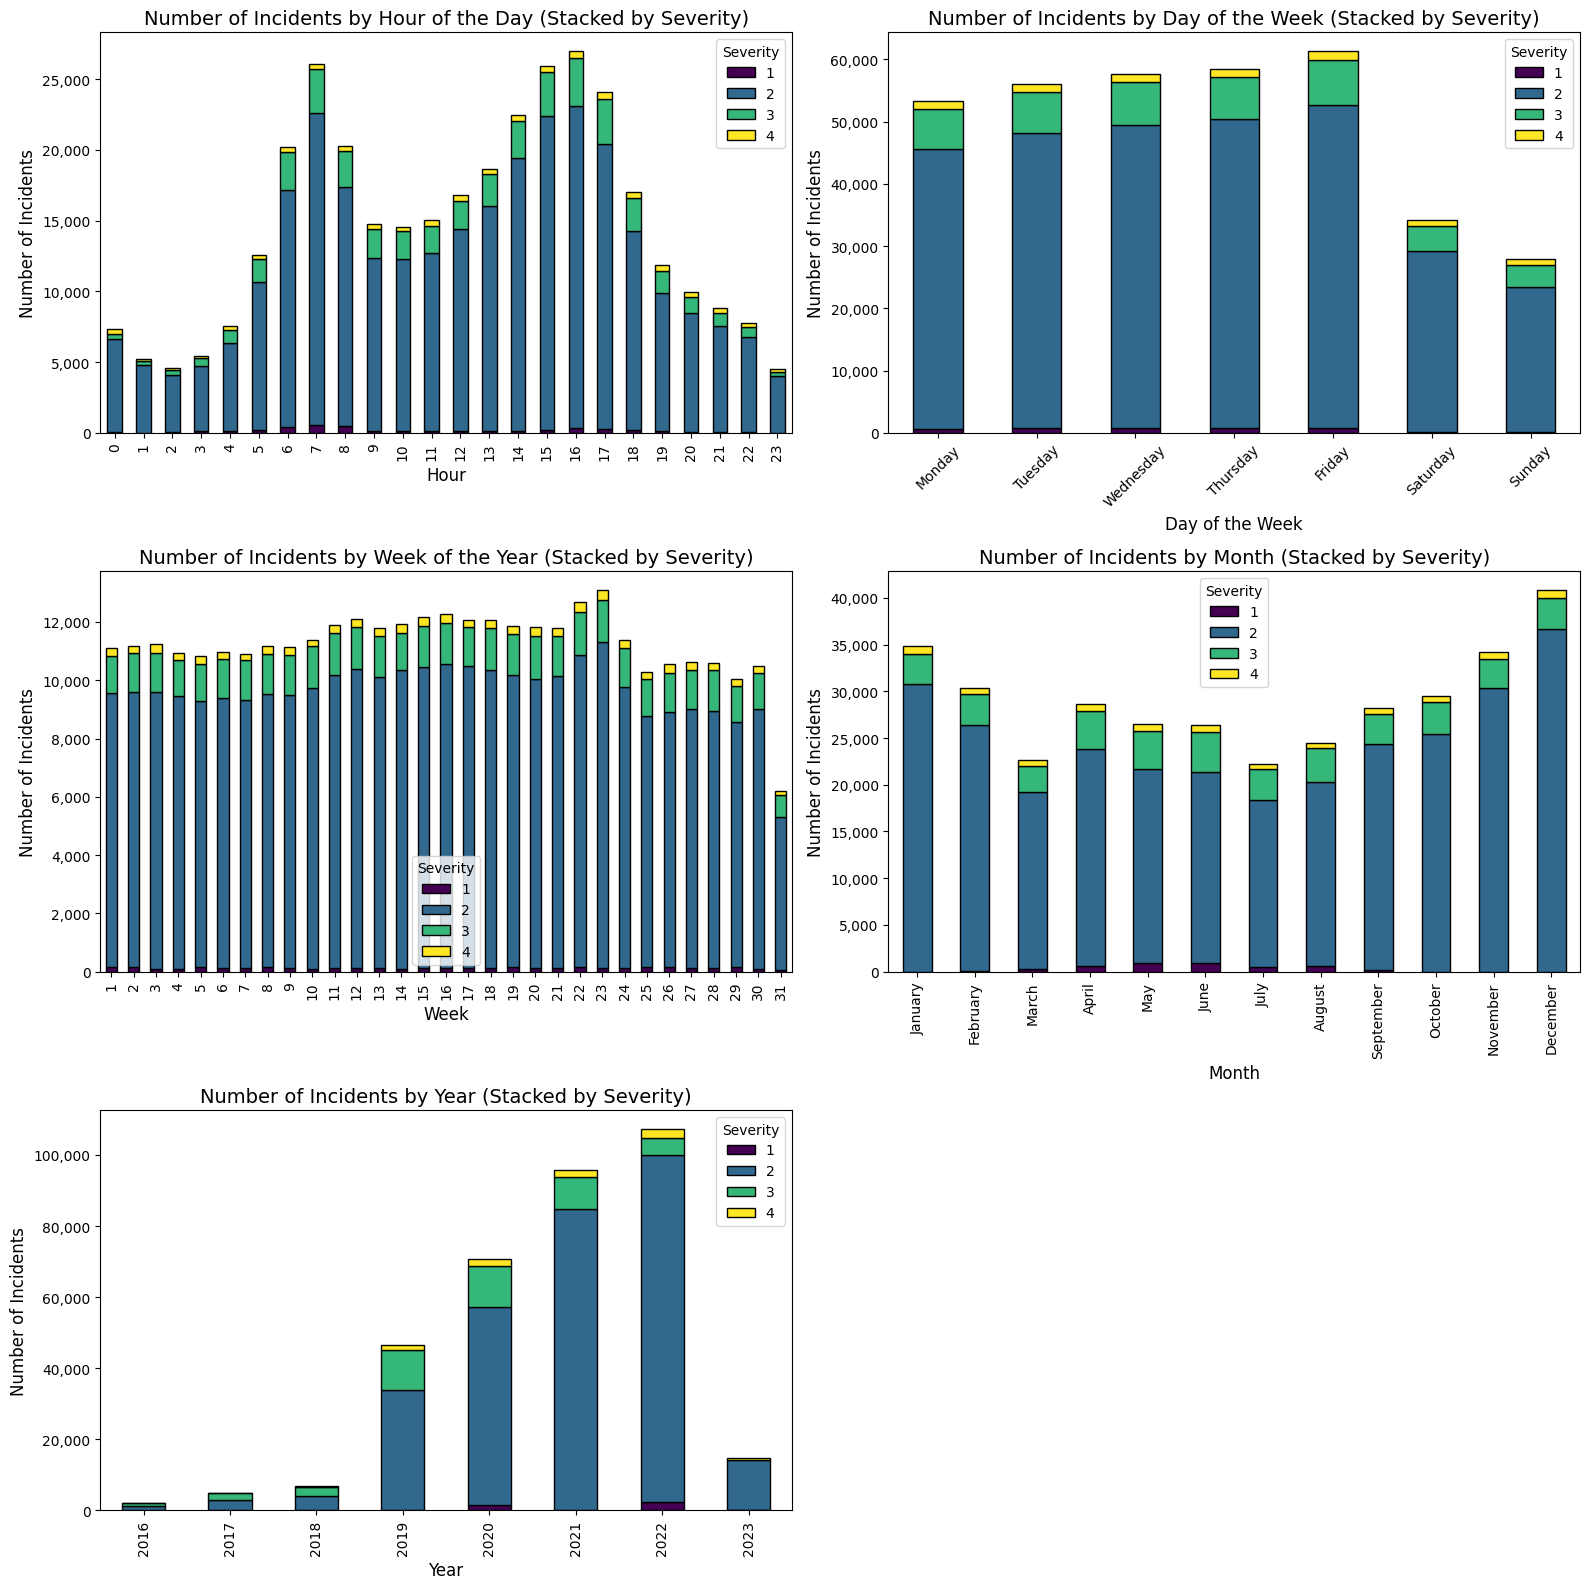

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import pandas as pd
import numpy as np

# Convert timestamp
sampled_data['Weather_Timestamp'] = pd.to_datetime(sampled_data['Weather_Timestamp'], errors='coerce')
sampled_data['Hour'] = sampled_data['Weather_Timestamp'].dt.hour
sampled_data['Day'] = sampled_data['Weather_Timestamp'].dt.day
sampled_data['Year'] = sampled_data['Weather_Timestamp'].dt.year
sampled_data['Month'] = sampled_data['Weather_Timestamp'].dt.month_name()
sampled_data['Day_of_Week'] = sampled_data['Weather_Timestamp'].dt.day_name()

# Crosstab grouped by severity
by_hour = pd.crosstab(sampled_data['Hour'], sampled_data['Severity'])
by_day = pd.crosstab(sampled_data['Day_of_Week'], sampled_data['Severity']).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
by_week = pd.crosstab(sampled_data['Day'], sampled_data['Severity'])
by_month = pd.crosstab(sampled_data['Month'], sampled_data['Severity']).reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
by_year = pd.crosstab(sampled_data['Year'], sampled_data['Severity'])

# Get severity levels sorted
severity_levels = sorted(sampled_data['Severity'].dropna().unique())

# Viridis colormap for severity
viridis = cm.get_cmap('viridis', len(severity_levels))
stack_colors = [viridis(i) for i in range(len(severity_levels))]

# Plot function
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

def plot_stacked(ax, data, title, xlabel):
    data = data[severity_levels]  # Ensure correct order
    data.plot(kind='bar', stacked=True, ax=ax, color=stack_colors, edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Number of Incidents', fontsize=12)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plot_stacked(axs[0, 0], by_hour, 'Number of Incidents by Hour of the Day (Stacked by Severity)', 'Hour')
plot_stacked(axs[0, 1], by_day, 'Number of Incidents by Day of the Week (Stacked by Severity)', 'Day of the Week')
axs[0, 1].tick_params(axis='x', rotation=45)

plot_stacked(axs[1, 0], by_week, 'Number of Incidents by Week of the Year (Stacked by Severity)', 'Week')
axs[1, 0].tick_params(axis='x', rotation=90)

plot_stacked(axs[1, 1], by_month, 'Number of Incidents by Month (Stacked by Severity)', 'Month')
axs[1, 1].tick_params(axis='x', rotation=90)

plot_stacked(axs[2, 0], by_year, 'Number of Incidents by Year (Stacked by Severity)', 'Year')

axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


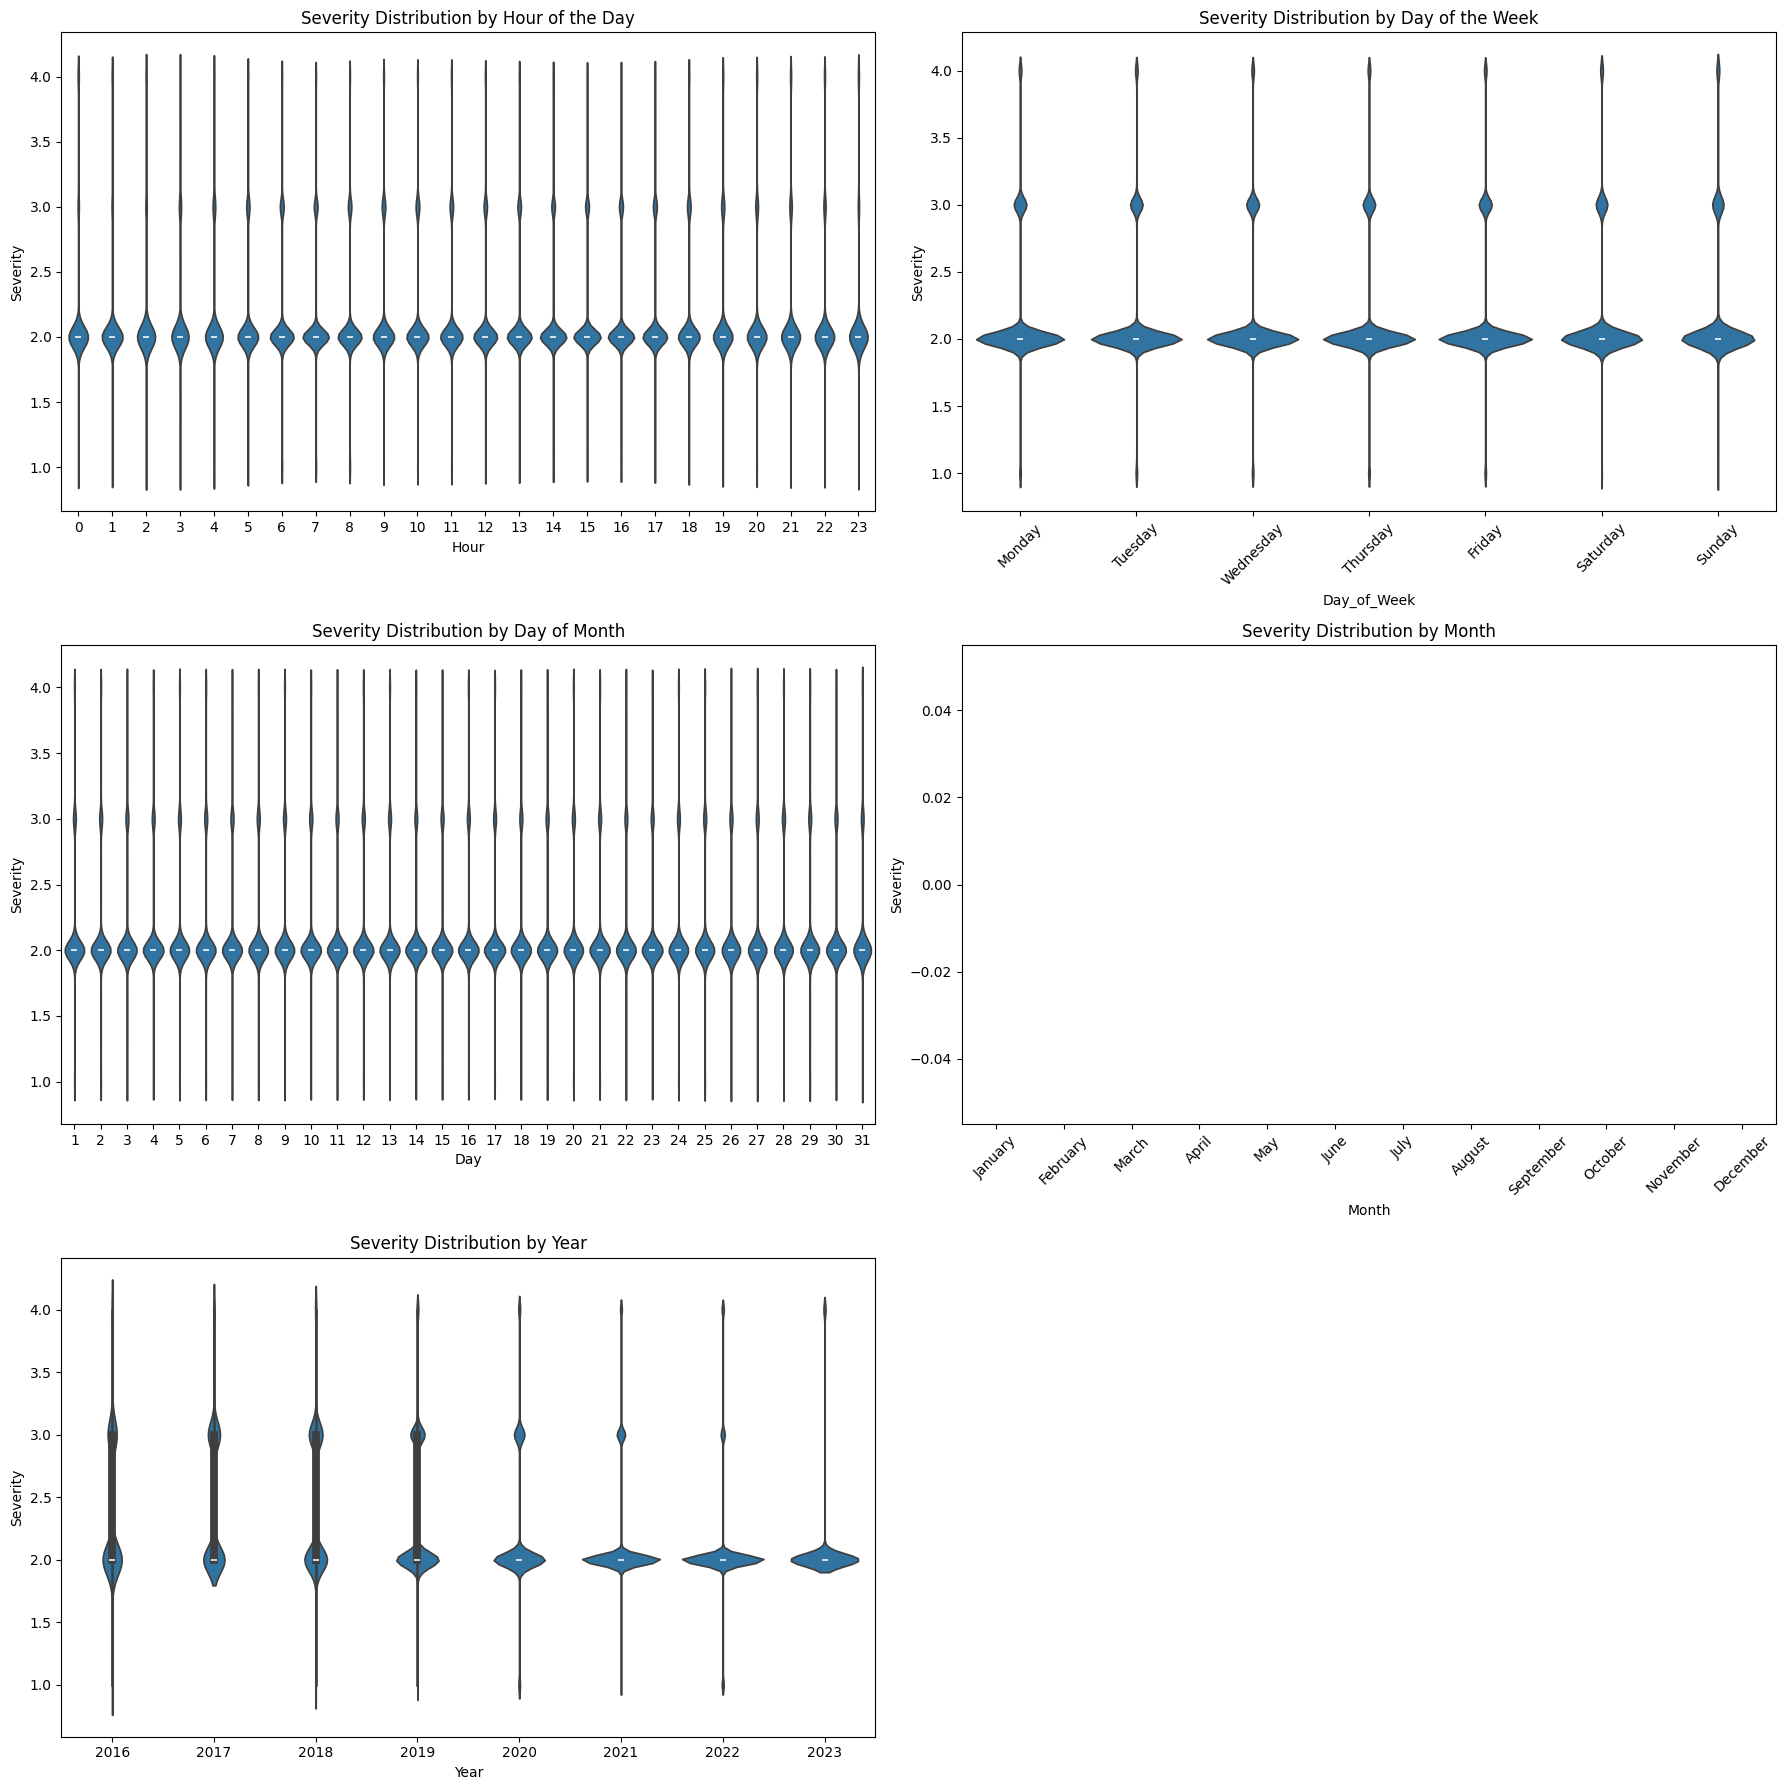

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Weather_Timestamp is datetime
sampled_data['Weather_Timestamp'] = pd.to_datetime(sampled_data['Weather_Timestamp'], errors='coerce')

# Extract time components for plotting
sampled_data['Hour'] = sampled_data['Weather_Timestamp'].dt.hour
sampled_data['Day'] = sampled_data['Weather_Timestamp'].dt.day
sampled_data['Month'] = sampled_data['Weather_Timestamp'].dt.month
sampled_data['Year'] = sampled_data['Weather_Timestamp'].dt.year
sampled_data['Day_of_Week'] = sampled_data['Weather_Timestamp'].dt.day_name()

# Create figure
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

sns.violinplot(data=sampled_data, x='Hour', y='Severity', ax=axs[0, 0], inner='box')
axs[0, 0].set_title('Severity Distribution by Hour of the Day')

sns.violinplot(data=sampled_data, x='Day_of_Week', y='Severity',
               order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
               ax=axs[0, 1], inner='box')
axs[0, 1].set_title('Severity Distribution by Day of the Week')
axs[0, 1].tick_params(axis='x', rotation=45)

sns.violinplot(data=sampled_data, x='Day', y='Severity', ax=axs[1, 0], inner='box')
axs[1, 0].set_title('Severity Distribution by Day of Month')

sns.violinplot(data=sampled_data, x='Month', y='Severity',
               order=['January','February','March','April','May','June','July','August','September','October','November','December'],
               ax=axs[1, 1], inner='box')
axs[1, 1].set_title('Severity Distribution by Month')
axs[1, 1].tick_params(axis='x', rotation=45)

sns.violinplot(data=sampled_data, x='Year', y='Severity', ax=axs[2, 0], inner='box')
axs[2, 0].set_title('Severity Distribution by Year')

axs[2, 1].axis('off')  # Empty subplot

plt.tight_layout()
plt.show()


In [46]:
def encode_timestamp(df):
  df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')

  # Extract features
  df['Weather_Year'] = df['Weather_Timestamp'].dt.year
  df['Weather_Month'] = df['Weather_Timestamp'].dt.month
  df['Weather_Day'] = df['Weather_Timestamp'].dt.day
  df['Weather_Hour'] = df['Weather_Timestamp'].dt.hour
  df['Weather_Day_of_Week'] = df['Weather_Timestamp'].dt.dayofweek  # Monday, Tuesday

  df.drop(columns=['Weather_Timestamp'], inplace=True)
  return df

In [47]:
sampled_data = encode_timestamp(sampled_data)

In [48]:
sampled_data

,Severity,Start_Time,End_Time,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Hour,Day,Year,Month,Day_of_Week,Weather_Year,Weather_Month,Weather_Day,Weather_Hour,Weather_Day_of_Week
0,2,610,655,0.000,77.0,62.0,29.92,10.0,NW,5.0,...,9,12,2019,6,Wednesday,2019,6,12,9,2
1,2,1417,116,0.056,45.0,48.0,29.91,10.0,W,5.0,...,23,3,2022,12,Saturday,2022,12,3,23,5
2,2,793,922,0.022,68.0,73.0,29.79,10.0,W,13.0,...,12,20,2022,8,Saturday,2022,8,20,12,5
3,2,1063,1183,1.054,27.0,86.0,28.49,10.0,ENE,15.0,...,17,21,2022,2,Monday,2022,2,21,17,0
4,2,106,253,0.046,42.0,34.0,29.77,10.0,CALM,0.0,...,1,4,2020,12,Friday,2020,12,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,450,470,0.158,40.0,77.0,29.55,10.0,SSE,15.0,...,7,15,2021,12,Wednesday,2021,12,15,7,2
499996,2,985,1060,0.040,78.0,87.0,29.94,10.0,SSE,13.0,...,16,19,2021,12,Sunday,2021,12,19,16,6
499997,2,1168,1293,0.549,52.0,12.0,24.94,10.0,WSW,12.0,...,19,13,2022,4,Wednesday,2022,4,13,19,2
499998,3,1040,1070,0.000,82.0,38.0,28.70,10.0,SSW,14.0,...,17,15,2020,5,Friday,2020,5,15,17,4


## Encode Wind Direction, Weather Day of Week

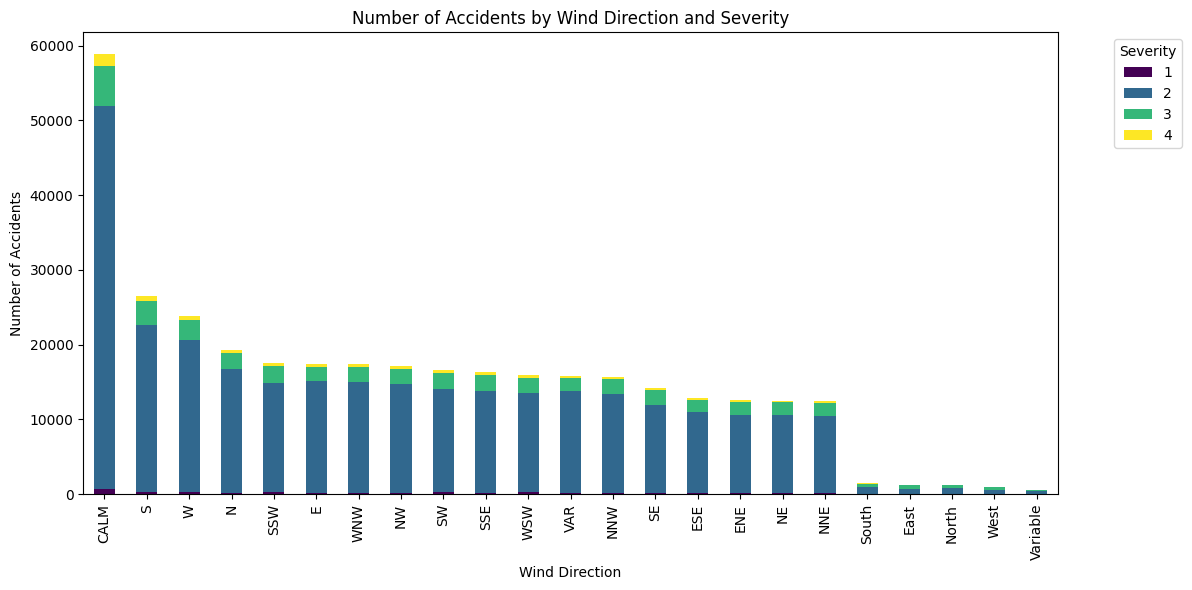

In [49]:
wind_direction_severity_counts = pd.crosstab(sampled_data['Wind_Direction'], sampled_data['Severity']).sort_index()

# Sort by total count in descending order
wind_direction_severity_counts['Total'] = wind_direction_severity_counts.sum(axis=1)
wind_direction_severity_counts = wind_direction_severity_counts.sort_values('Total', ascending=False)
wind_direction_severity_counts.drop(columns='Total', inplace=True)

wind_direction_severity_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.xlabel("Wind Direction")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Wind Direction and Severity")
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


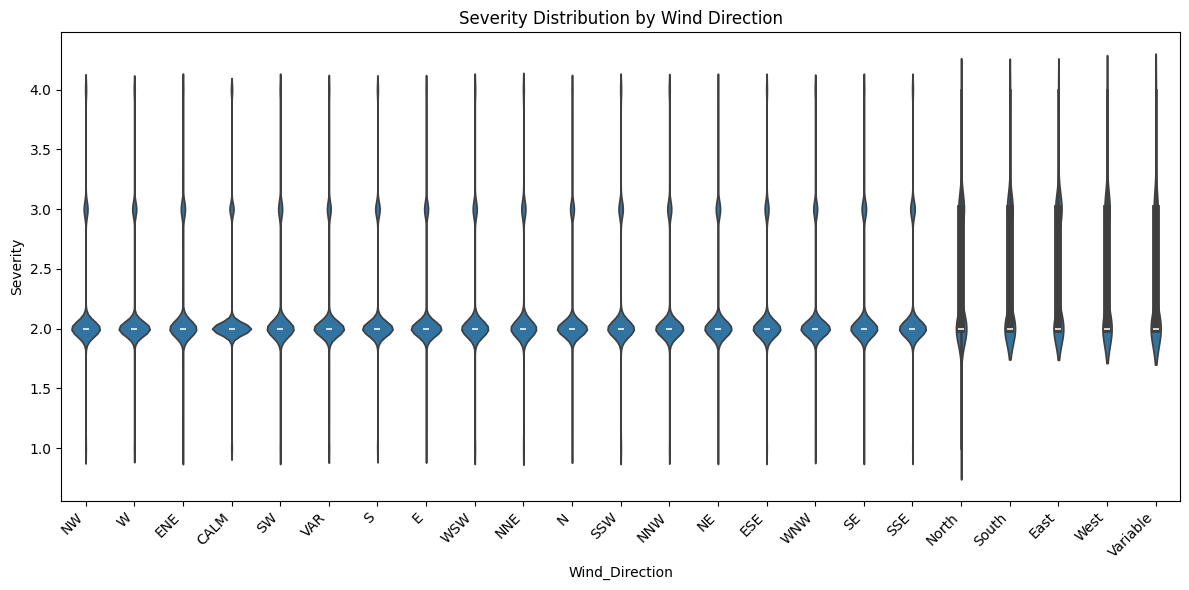

In [50]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='Wind_Direction', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by Wind Direction')
plt.tight_layout()
plt.show()


In [51]:
# Perform One-Hot Encoding on the 'Wind_Direction' column
wind_direction_dummies = pd.get_dummies(sampled_data['Wind_Direction'], prefix='Wind_Direction')

# Convert True/False to 1/0 explicitly
wind_direction_dummies = wind_direction_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, wind_direction_dummies], axis=1)

# Drop the original 'Wind_Direction' column
sampled_data.drop(columns=['Wind_Direction'], inplace=True)

print(sampled_data.head())

   Severity  Start_Time  End_Time  Distance(mi)  Temperature(F)  Humidity(%)  \
0         2         610       655         0.000            77.0         62.0   
1         2        1417       116         0.056            45.0         48.0   
2         2         793       922         0.022            68.0         73.0   
3         2        1063      1183         1.054            27.0         86.0   
4         2         106       253         0.046            42.0         34.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  ...  \
0         29.92            10.0              5.0                0.0  ...   
1         29.91            10.0              5.0                0.0  ...   
2         29.79            10.0             13.0                0.0  ...   
3         28.49            10.0             15.0                0.0  ...   
4         29.77            10.0              0.0                0.0  ...   

   Wind_Direction_SSE  Wind_Direction_SSW  Wind_Direction_SW  

In [52]:
# Perform One-Hot Encoding on the 'Weather_Day_of_Week' column
weather_day_of_week_dummies = pd.get_dummies(sampled_data['Weather_Day_of_Week'], prefix='Weather_Day_of_Week')

# Convert True/False to 1/0 explicitly
weather_day_of_week_dummies = weather_day_of_week_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_day_of_week_dummies], axis=1)

# Drop the original 'Weather_Day_of_Week' column
sampled_data.drop(columns=['Weather_Day_of_Week'], inplace=True)

print(sampled_data.head())

   Severity  Start_Time  End_Time  Distance(mi)  Temperature(F)  Humidity(%)  \
0         2         610       655         0.000            77.0         62.0   
1         2        1417       116         0.056            45.0         48.0   
2         2         793       922         0.022            68.0         73.0   
3         2        1063      1183         1.054            27.0         86.0   
4         2         106       253         0.046            42.0         34.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  ...  \
0         29.92            10.0              5.0                0.0  ...   
1         29.91            10.0              5.0                0.0  ...   
2         29.79            10.0             13.0                0.0  ...   
3         28.49            10.0             15.0                0.0  ...   
4         29.77            10.0              0.0                0.0  ...   

   Wind_Direction_WNW  Wind_Direction_WSW  Wind_Direction_West

## Convert Boolean Columns from "True"/"False" to 1/0

In [53]:
boolean_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'
]

/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_79514/4064182429.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(severity_levels))


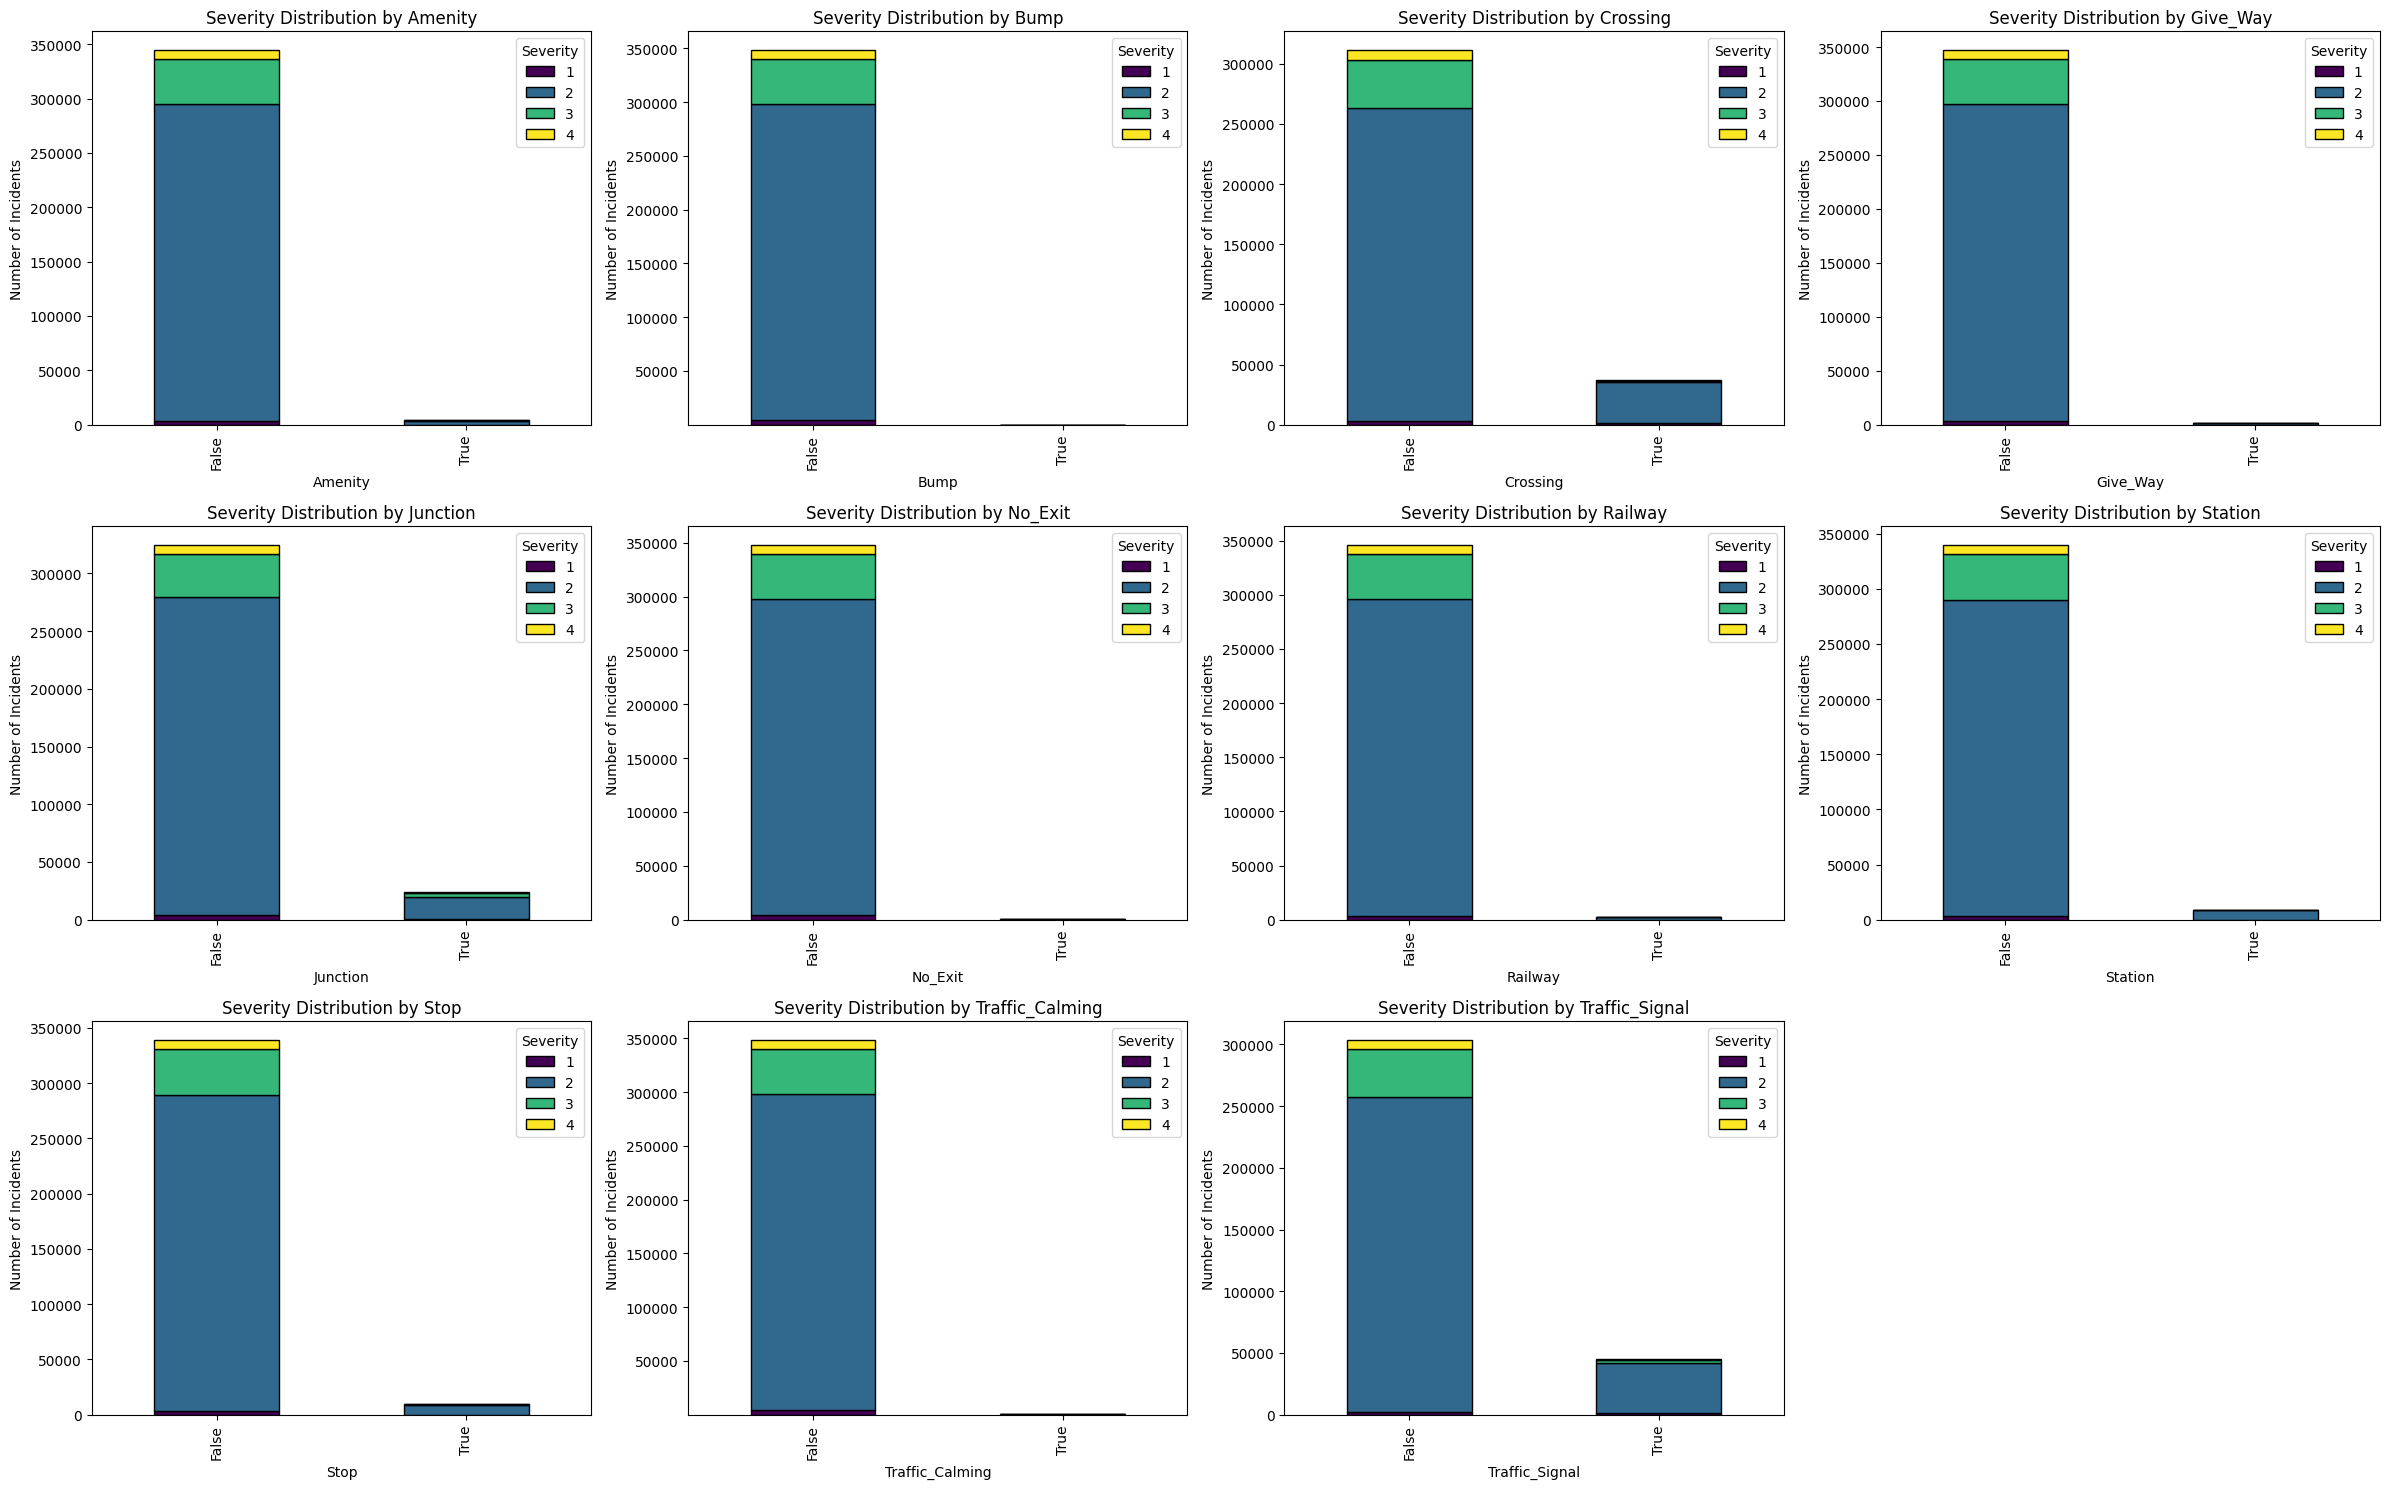

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Number of boolean features
n = len(boolean_columns)
ncols = 4
nrows = (n + ncols - 1) // ncols  # ceiling division

# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))
axs = axs.flatten()

# Get unique sorted severity levels
severity_levels = sorted(sampled_data['Severity'].dropna().unique())

# Viridis colormap
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis', len(severity_levels))
colors = [cmap(i) for i in range(len(severity_levels))]

# Plot stacked bars
for i, col in enumerate(boolean_columns):
    ct = pd.crosstab(sampled_data[col], sampled_data['Severity'])
    ct = ct[severity_levels]  # Ensure consistent order
    ct.plot(kind='bar', stacked=True, ax=axs[i], color=colors, edgecolor='black')

    axs[i].set_title(f'Severity Distribution by {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Number of Incidents')
    axs[i].legend(title='Severity', loc='upper right')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


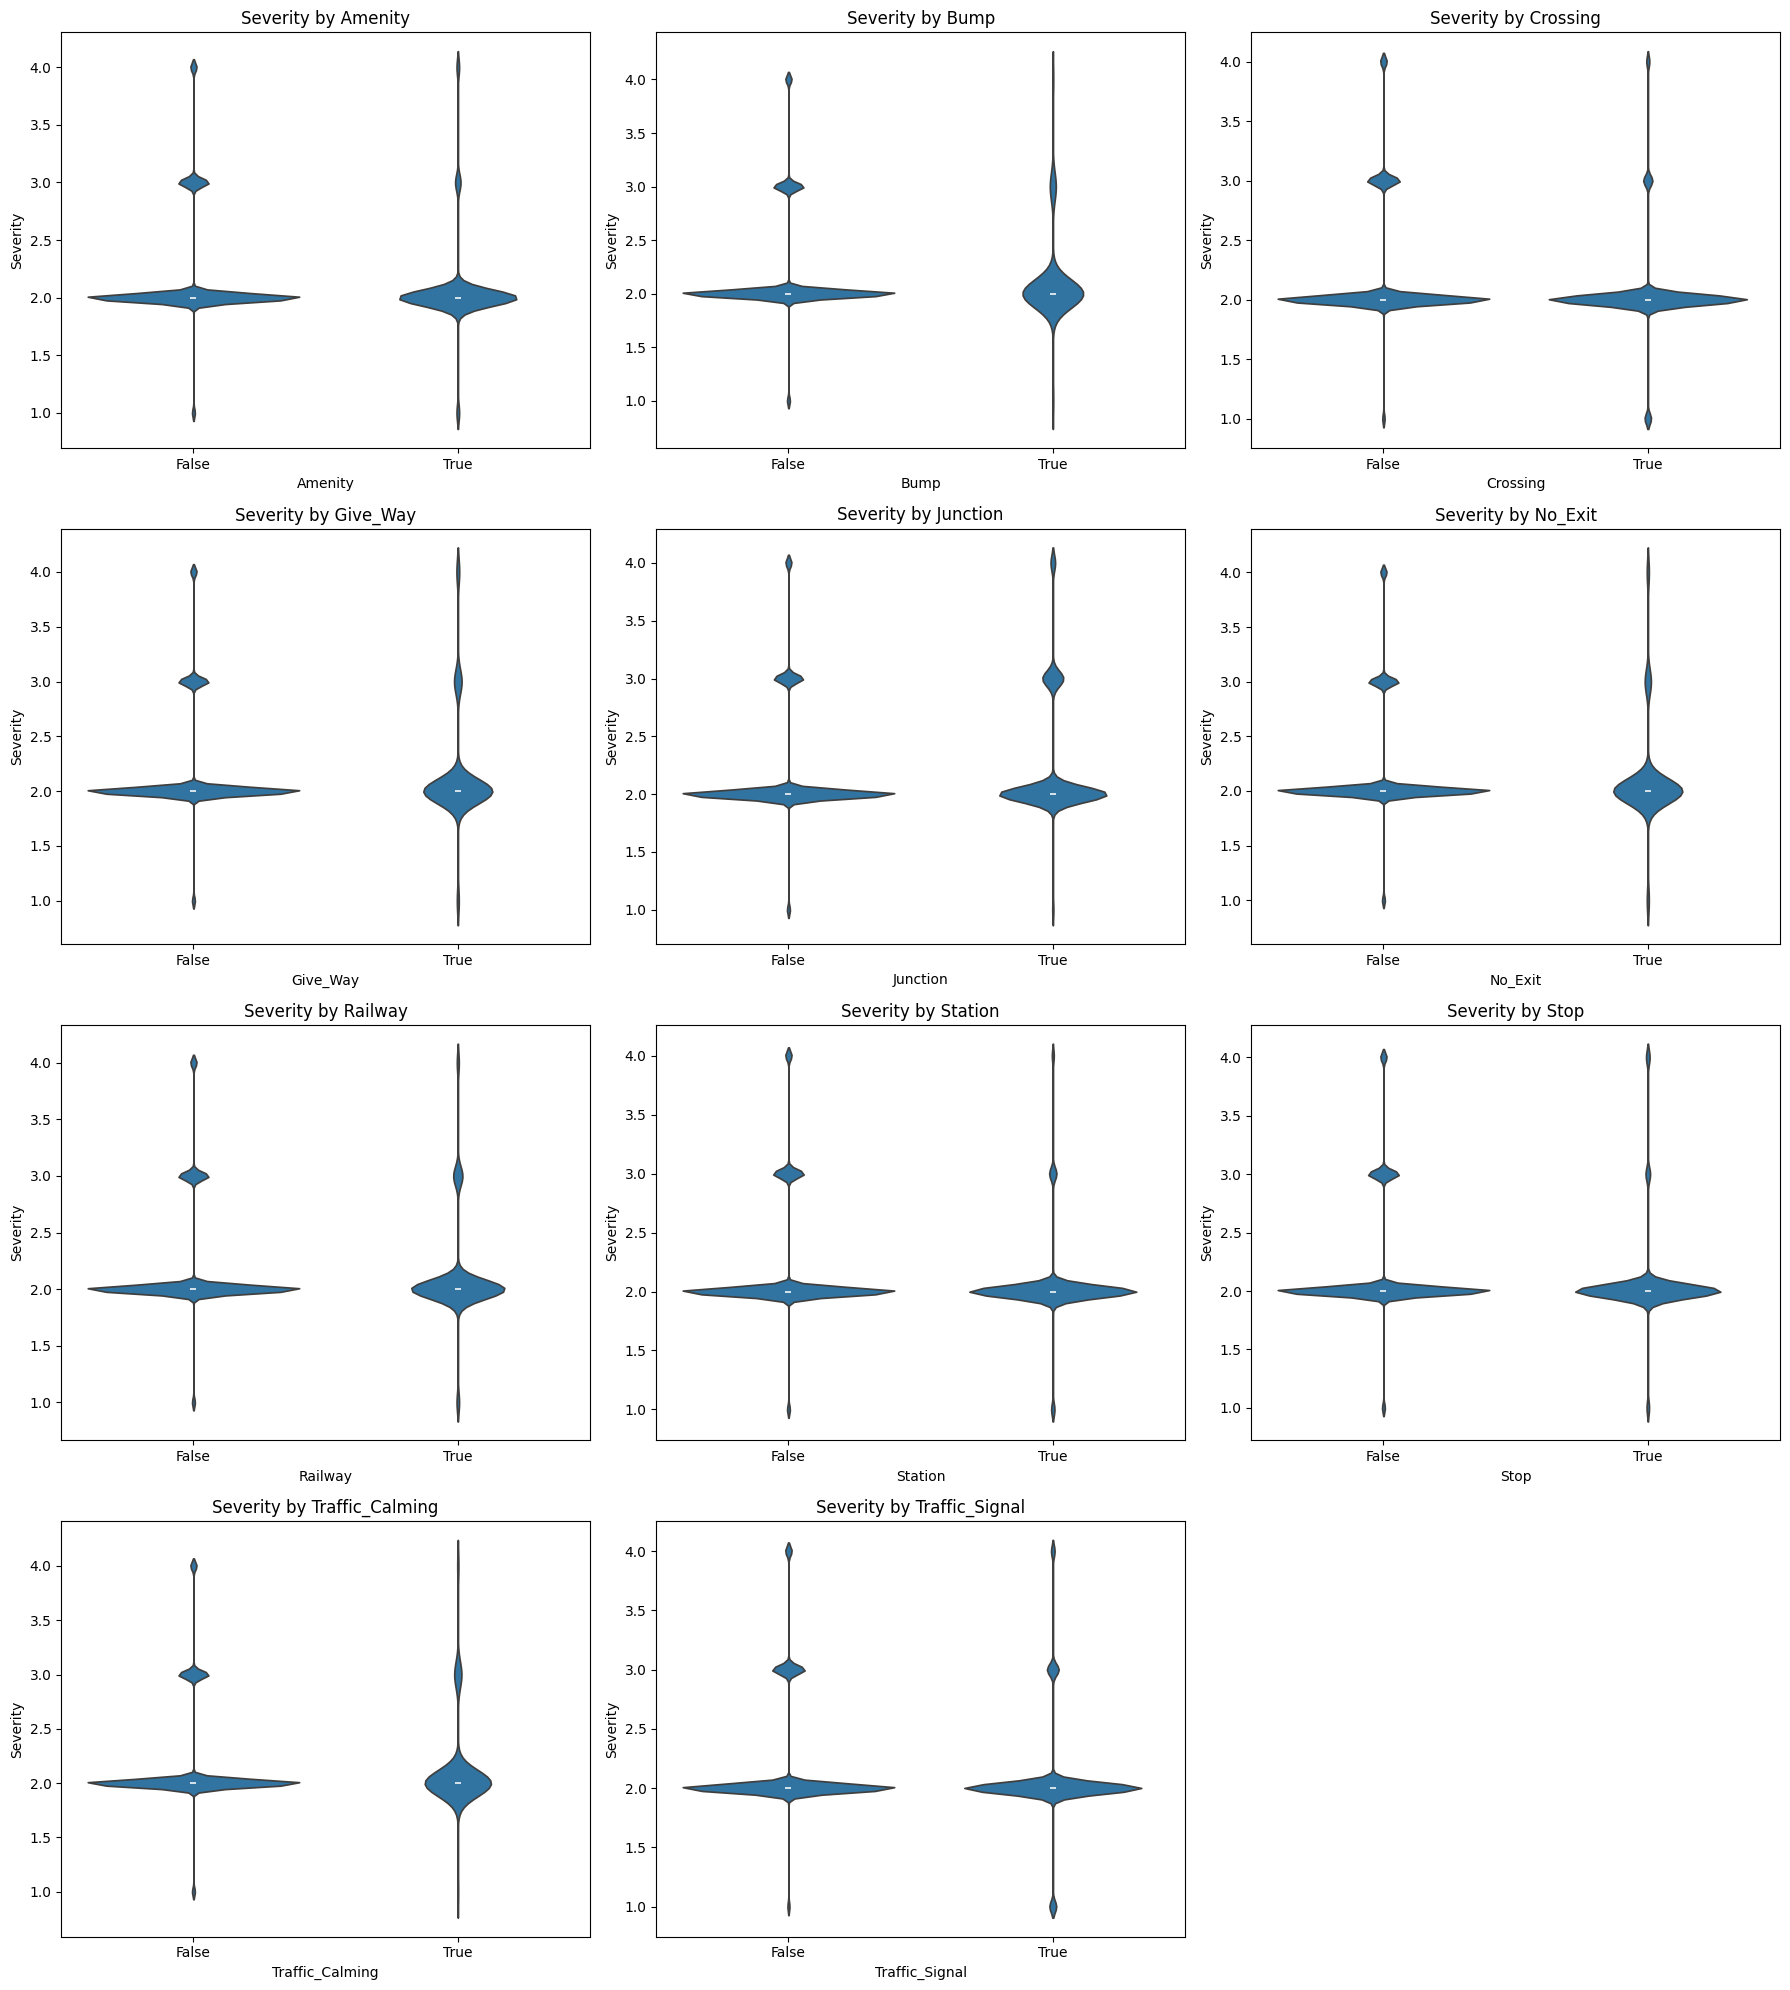

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of boolean features
n = len(boolean_columns)
ncols = 3
nrows = (n + ncols - 1) // ncols  # ceiling division

# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))
axs = axs.flatten()  # Flatten to 1D for easier indexing

# Plot violin plots
for i, col in enumerate(boolean_columns):
    sns.violinplot(data=sampled_data, x=col, y='Severity', ax=axs[i])
    axs[i].set_title(f'Severity by {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Severity')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [56]:


# Convert string 'True'/'False' to actual boolean values
sampled_data[boolean_columns] = sampled_data[boolean_columns].replace({'True': True, 'False': False})

# Convert True/False to 1/0 for the specified columns
sampled_data[boolean_columns] = sampled_data[boolean_columns].astype(int)

# print(sampled_data[boolean_columns].head())